<a href="https://colab.research.google.com/github/yporquenoahora/EDA/blob/master/src/notebooks/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Viz Playgorund - Personal case</h1>

How you describe yourself, how you really are. 
How far away from the mainstream taste are u?
And me?

That's how I saw myself before this EDA:

Eclectic taste, focus on experimental music, mainly electronic, enjoy the dark new wave from the 80's, psycodelic rock and some happy cheesy songs from time to time

Let´s see how far from reallity I was

In [394]:
%pip install plotly
%pip install nbformat==5.1.2
%pip install seaborn

  Using cached nbformat-5.1.2-py3-none-any.whl (113 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.3
    Uninstalling nbformat-5.7.3:
      Successfully uninstalled nbformat-5.7.3
  Rolling back uninstall of nbformat
  Moving to c:\python39\lib\site-packages\nbformat-5.7.3.dist-info\
   from C:\Python39\Lib\site-packages\~bformat-5.7.3.dist-info
  Moving to c:\python39\lib\site-packages\nbformat\
   from C:\Python39\Lib\site-packages\~bformat
Note: you may need to restart the kernel to use updated packages.


Reason for being yanked: Name generation process created inappropriate id values
ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python39\\Scripts\\jupyter-trust.exe' -> 'c:\\Python39\\Scripts\\jupyter-trust.exe.deleteme'



Note: you may need to restart the kernel to use updated packages.


In [395]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from  matplotlib.ticker import PercentFormatter


In [396]:
dfAll = pd.read_csv("../data/songs.csv")#.iloc[:,1:]
dfPersonal = pd.read_csv("../data/my_most_listened.csv")#.iloc[:,1:]
dfPersonal["personal"] = True
dfAll["personal"] = False
dfAll.columns

Index(['id', 'names', 'artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'genre',
       'personal'],
      dtype='object')

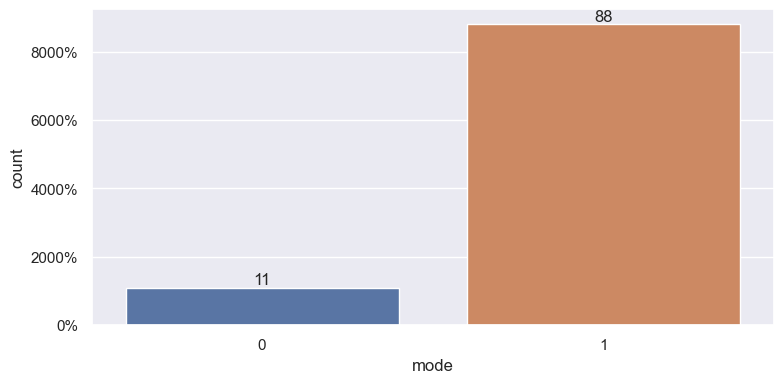

In [397]:
sns.set(rc = {'figure.figsize':(8, 4)})
g = sns.countplot(x='mode',  data=dfAll)
g.bar_label(g.containers[0]);

g.axes.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [398]:
release_date_serie_year = pd.to_datetime(dfAll["release_date"]).dt.year
dfAll["release_date_year"] = release_date_serie_year
release_date_serie_year = pd.to_datetime(dfPersonal["release_date"]).dt.year
dfPersonal["release_date_year"] = release_date_serie_year

In [399]:
dfPersonal.columns

Index(['Unnamed: 0', 'names', 'artists', 'release_date', 'range', 'id',
       'genre', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id.1', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'personal', 'release_date_year'],
      dtype='object')

In [400]:
dfPersonal.loc[:,["names", "release_date_year"]]

,names,release_date_year
0,Mon Amour - Remix,2021
1,Foto Pa Ti,2014
2,Amiga mía,1997
3,"Pena, Penita, Pena!",2015
4,Poison Lips,2009
...,...,...
145,Wake Up,2004
146,Googa Mama,2016
147,HDA (Historia del Arte),2016
148,No hay nada más triste que lo tuyo,2002


In [382]:
dfAll.loc[:,["names", "release_date_year"]]

,names,release_date_year
0,Too Young,2008
1,Because of You (with Percy Faith & His Orchestra),2013
2,How High the Moon,2005
3,Come On-A My House,1951
4,"Be My Love (From ""The Toast of New Orleans"")",1991
...,...,...
94,I'm Sorry,2012
95,It's Now or Never,2002
96,Handy Man,2011
97,Stuck On You,2002


In [401]:
print(dfAll.sort_values("release_date_year"))

                        id                                              names  \
37  2dX2phLETbjqZA0D78ms4T                                        Secret Love   
8   4mSKeFHnAjwZIG4wQDCe2Z  The Loveliest Night of the Year (From "The Gre...   
3   2scbGWVjIYsfieovyRyfv1                                 Come On-A My House   
15  70ZRroKKjOBvGkBlHoDDp0                                       Half As Much   
79  1XRA4Tjb2YrcQU5ThDllCw                          The Battle Of New Orleans   
..                     ...                                                ...   
33  3EcdioSeXbtELIdpFGDg5W                                            Sh-Boom   
72  3RVnGPQfCm1r9Apk5Fvrpp                                       Witch Doctor   
18  4cXWZgLjzJMjQaSlOVFYJ7                                   Here In My Heart   
69  5ca1c1EGb3Q1tnXXPRrAhs       Volare (Nel Blu Dipinto Di Blu) [Remastered]   
63  7kTmbEXdGYWmxn7Z1jrNrW                                            So Rare   

             artists releas

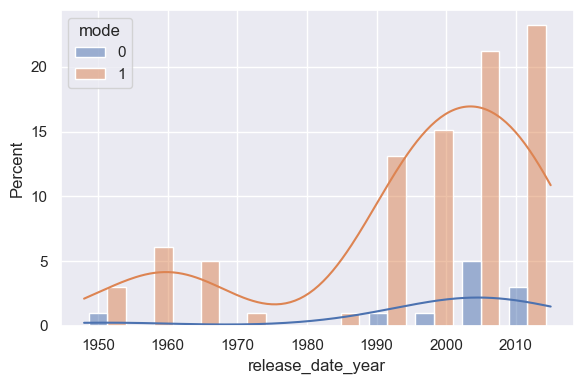

In [417]:
sns.set(rc = {'figure.figsize':(6, 4)})
b = sns.histplot(dfAll.sort_values("release_date_year"), x="release_date_year", hue="mode", stat="percent", multiple="dodge", shrink=.8,  kde = True)
#b.set_xticklabels(b.get_xticklabels(), rotation=90);

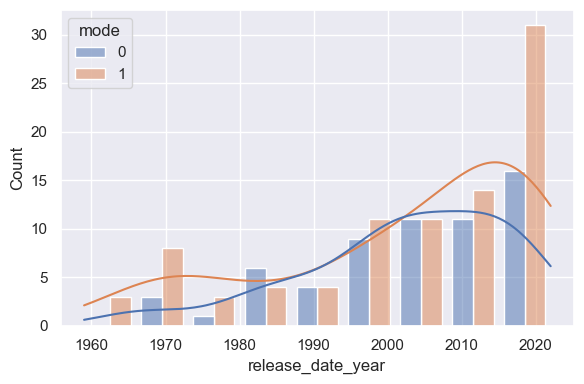

In [414]:
sns.set(rc = {'figure.figsize':(6, 4)})
b = sns.histplot(dfPersonal.sort_values("release_date_year"), x="release_date_year", hue="mode", multiple="dodge", shrink=.8, kde=True)
#b.set_xticklabels(b.get_xticklabels(), rotation=90);

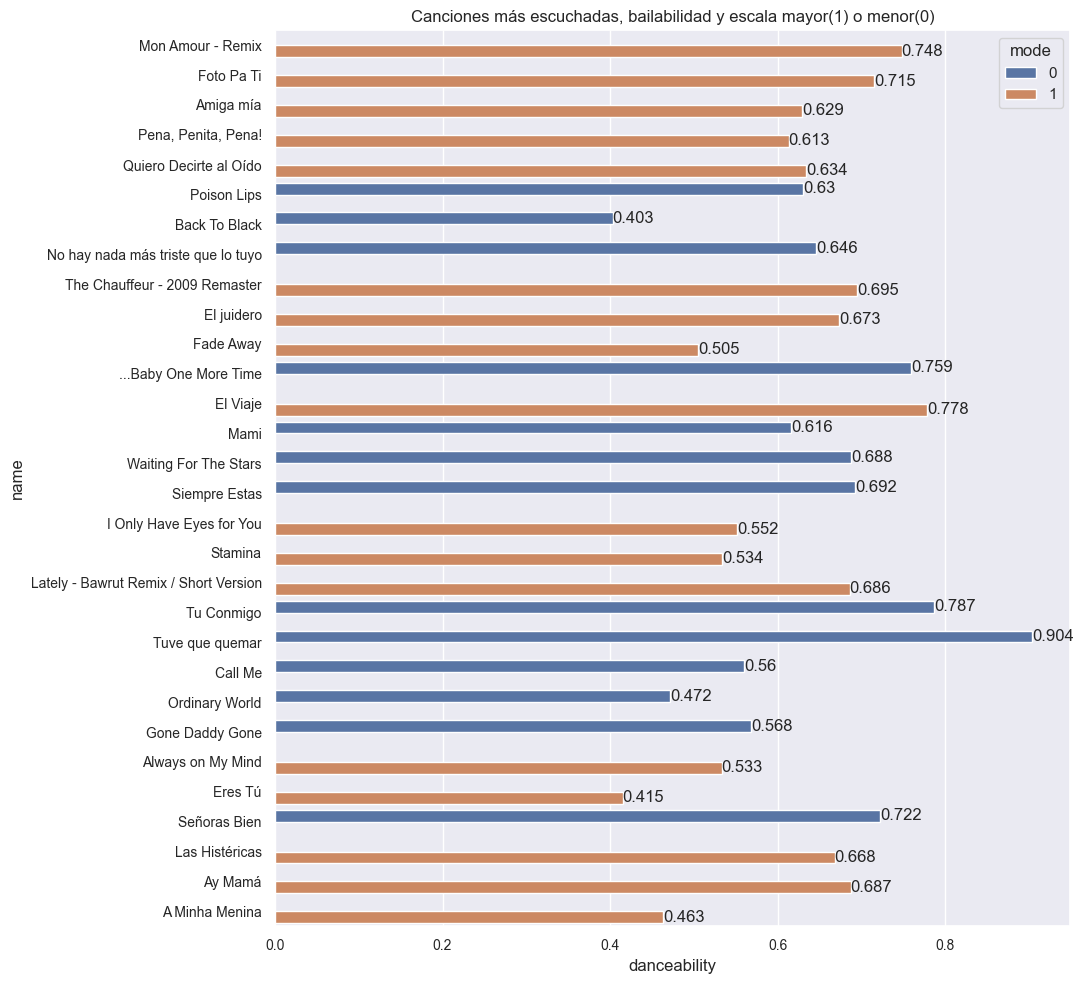

In [265]:

sns.set(rc = {'figure.figsize':(11, 10)})


b = sns.barplot(data=dfPersonal.head(30), x="danceability", y="name", hue="mode",orient="h",saturation=0.75, width=0.8)
sns.set(rc={"figure.figsize":(8, 18)}) #width=8, height=4
b.set_title("Canciones más escuchadas, bailabilidad y escala mayor(1) o menor(0)")

b.tick_params(labelsize=10)
b.bar_label(b.containers[0]);

b.bar_label(b.containers[1]);

In [431]:
ohne = dfAll.drop(columns = ["personal", "release_date_year"])
ohne.corr()

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\4100867388.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.426179,0.150485,0.250807,-0.041267,0.340370,-0.302185,-0.112479,-0.280551,0.657733,0.187168,-0.432582,0.210622
energy,0.426179,1.000000,0.245267,0.730437,-0.218115,0.281867,-0.487104,0.125694,0.007772,0.755008,0.401845,-0.422527,0.156935
key,0.150485,0.245267,1.000000,0.225749,0.020968,0.021135,0.096699,-0.137639,0.048976,0.210847,0.148004,-0.101235,0.104119
loudness,0.250807,0.730437,0.225749,1.000000,-0.110477,0.031982,-0.309193,-0.117404,0.069770,0.475423,0.159589,-0.301814,-0.016289
mode,-0.041267,-0.218115,0.020968,-0.110477,1.000000,-0.196432,-0.005135,-0.157672,-0.065674,-0.117354,-0.079721,0.088905,-0.182278
speechiness,0.340370,0.281867,0.021135,0.031982,-0.196432,1.000000,-0.110065,-0.070360,-0.070858,0.300835,0.321655,-0.239532,0.155636
acousticness,-0.302185,-0.487104,0.096699,-0.309193,-0.005135,-0.110065,1.000000,-0.242361,0.081432,-0.485553,-0.263277,0.247259,-0.112920
instrumentalness,-0.112479,0.125694,-0.137639,-0.117404,-0.157672,-0.070360,-0.242361,1.000000,-0.001718,0.108829,0.120446,0.019007,0.122932
liveness,-0.280551,0.007772,0.048976,0.069770,-0.065674,-0.070858,0.081432,-0.001718,1.000000,-0.058254,0.143222,0.116555,0.012965
valence,0.657733,0.755008,0.210847,0.475423,-0.117354,0.300835,-0.485553,0.108829,-0.058254,1.000000,0.489005,-0.582939,0.221131


In [439]:
np.bool_

numpy.bool_

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\2341661797.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\2341661797.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\2341661797.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



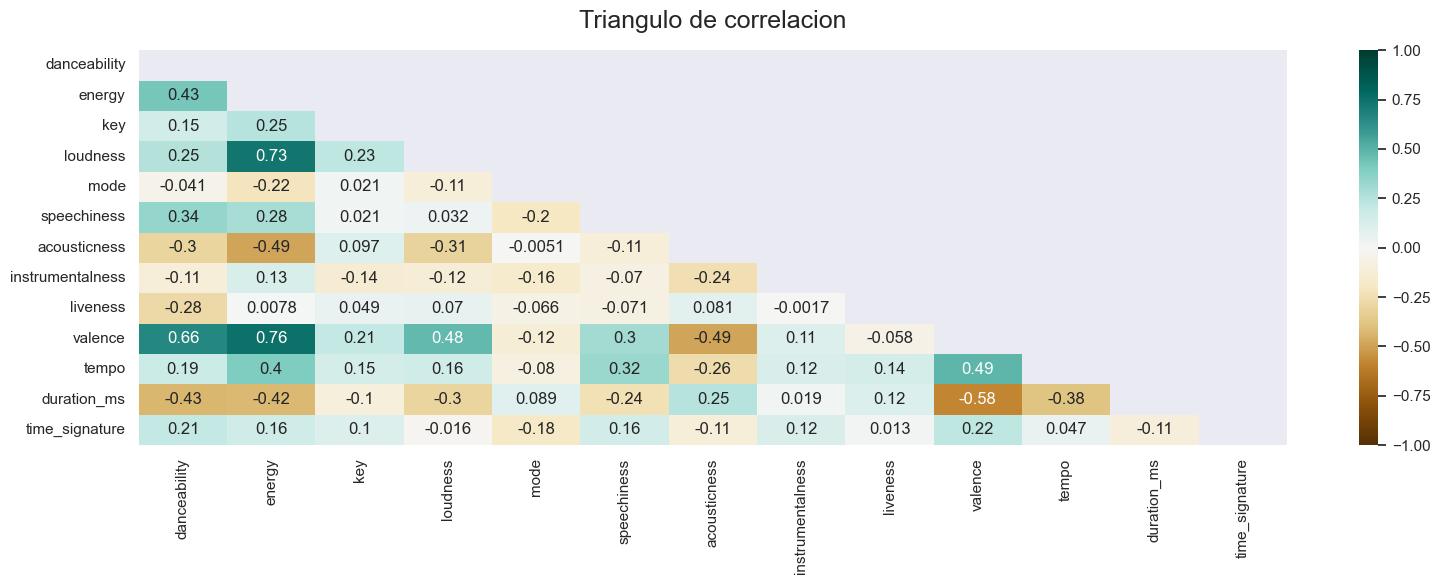

In [442]:
plt.figure(figsize=(16, 6))

np.triu(np.ones_like(ohne.corr()))
mask = np.triu(np.ones_like(ohne.corr(), dtype=np.bool_))

heatmap = sns.heatmap(ohne.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangulo de correlacion', fontdict={'fontsize':18}, pad=16);

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\2583233021.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



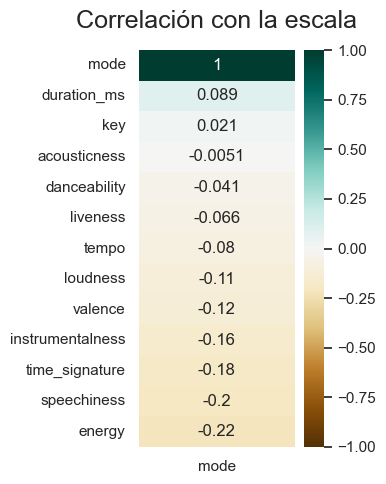

In [451]:
plt.figure(figsize=(4, 5))
heatmap = sns.heatmap(ohne.corr()[['mode']].sort_values(by='mode', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación con la escala', fontdict={'fontsize':18}, pad=16);

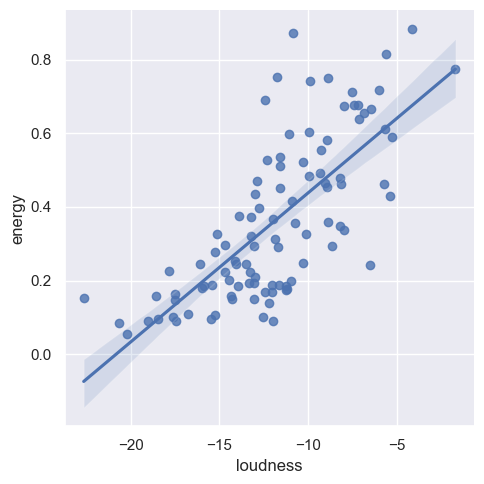

In [462]:
sns.lmplot(x = 'loudness', y = 'energy', data=dfAll, fit_reg=True)

In [64]:
dfGenres = pd.read_csv("../data/songs_genres.csv").iloc[:,1:]
dfGenresPersonal = pd.read_csv("../data/my_songs_genres.csv").iloc[:,1:]
dfGenresPersonal.columns

Index(['chilean indie', 'deep latin alternative', 'cantautor',
       'latin arena pop', 'latin pop', 'mexican pop', 'rock en espanol',
       'spanish pop', 'granada indie', 'alternative dance',
       ...
       'hi-nrg', 'sophisti-pop', 'album rock', 'hard rock', 'olympia wa indie',
       'baroque pop', 'canadian indie', 'quebec indie', 'bboy',
       'instrumental funk'],
      dtype='object', length=164)

In [469]:
sort = dfAll.sort_values("release_date")
#sort.rename(columns={"Unnamed: 0":"ranking"}, inplace=True)
#sort.set_index("ranking")


In [470]:
sortPersonal = dfPersonal.sort_values("release_date")

In [473]:
# prepare data frame
#df = timesData.iloc[:100,:]

# Creating trace1
trace1 = go.Scatter(
                    x = sort['release_date_year'],
                    y = sort['energy'],
                    name = 'Energía mainstream',
                    mode= 'lines',
                    marker = dict(color = 'rgba(160, 112, 2, 0.8)'),
                    text = sort['energy'])

trace2 = go.Scatter(
                    x = sortPersonal['release_date_year'],
                    y = sortPersonal['energy'],
                    name = 'Mi energía',
                    mode= 'lines',
                    marker = dict(color = 'rgba(1, 112, 2, 0.8)'),
                    text = sortPersonal['loudness'])


data = [trace1,trace2]

layout = dict(title = 'Evolucion de la energia',
             xaxis= dict(title= '',ticklen=5, ticks="outside", tickson="boundaries",), 
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)






In [475]:
trace1 = go.Scatter(x=dfAll["release_date"], y=dfAll["loudness"], name="loudness", mode="markers")
trace2 = go.Scatter(x=dfPersonal["release_date"], y=dfPersonal["loudness"], name="loudness", mode="markers")
# Creating trace1

data = [trace1,trace2]

layout = dict(title = 'Evolucion de la loudness',
             xaxis= dict(title= '',ticklen=.05, ticks="outside", tickson="boundaries"), 
           )

fig = go.Figure(data = data, layout=layout)

fig.update_yaxes(title_text="instrumentalness")

fig.show()






In [75]:
dfGenres = dfGenres.sort_values(by=0,axis=1, ascending=False)

In [279]:
dfGenres

,adult standards,bubblegum pop,rockabilly,rock-and-roll,rhythm and blues,doo-wop,lounge,deep adult standards,sunshine pop,mellow gold,...,exotica,library music,laboratorio,classic soundtrack,movie tunes,soft rock,canadian country,american modern classical,folk,american folk revival
0,99,99,99,99,97,97,95,93,92,92,...,55,55,55,52,45,34,34,10,5,5


In [74]:
dfGenresPersonal = dfGenresPersonal.sort_values(by=0,axis=1, ascending=False)

In [278]:
dfGenresPersonal

,disco,spanish noise pop,spanish indie pop,spanish electropop,rap latina,instrumental funk,bboy,new rave,baroque pop,rock,...,doo-wop,rhythm and blues,rap marseille,hip-hop experimental,electro swing,nu jazz,urbano espanol,rap canario,chilean rock,dominican pop
0,149,148,148,147,147,146,146,145,145,145,...,23,23,22,22,22,22,21,21,15,13


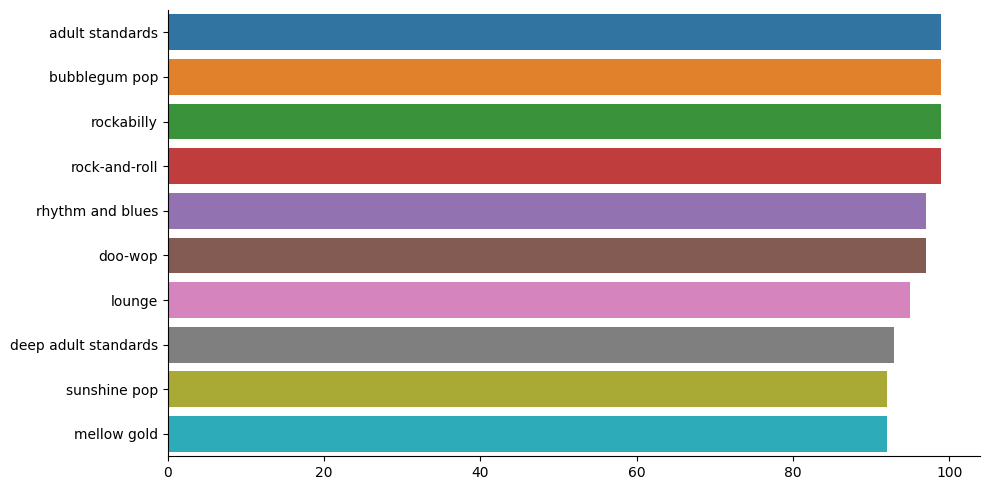

In [211]:
 
sns.catplot(data = dfGenres.iloc[:,:10], orient="h", kind="bar",height= 5, aspect= 2)

#sns.catplot(data = dfGenresPersonal.iloc[:,-10:], orient="h", kind="bar",height= 3, aspect= 1)



Escucho alguno de los generos mas populares?

In [275]:
print(dfGenres.columns, len(dfGenres.columns))
dfGenres

Index(['adult standards', 'bubblegum pop', 'rockabilly', 'rock-and-roll',
       'rhythm and blues', 'doo-wop', 'lounge', 'deep adult standards',
       'sunshine pop', 'mellow gold', 'nashville sound', 'easy listening',
       'man's orchestra', 'vocal harmony group', 'soul', 'swing', 'vocal jazz',
       'canadian pop', 'louisiana blues', 'memphis blues', 'new orleans blues',
       'cowboy western', 'space age pop', 'mambo', 'novelty',
       'classic italian pop', 'italian adult pop', 'big band', 'jazz clarinet',
       'tin pan alley', 'torch song', 'exotica', 'library music',
       'laboratorio', 'classic soundtrack', 'movie tunes', 'soft rock',
       'canadian country', 'american modern classical', 'folk',
       'american folk revival'],
      dtype='object') 41


,adult standards,bubblegum pop,rockabilly,rock-and-roll,rhythm and blues,doo-wop,lounge,deep adult standards,sunshine pop,mellow gold,...,exotica,library music,laboratorio,classic soundtrack,movie tunes,soft rock,canadian country,american modern classical,folk,american folk revival
0,99,99,99,99,97,97,95,93,92,92,...,55,55,55,52,45,34,34,10,5,5


In [277]:
print(dfGenresPersonal.columns)
dfGenresPersonal

Index(['disco', 'spanish noise pop', 'spanish indie pop', 'spanish electropop',
       'rap latina', 'instrumental funk', 'bboy', 'new rave', 'baroque pop',
       'rock',
       ...
       'doo-wop', 'rhythm and blues', 'rap marseille', 'hip-hop experimental',
       'electro swing', 'nu jazz', 'urbano espanol', 'rap canario',
       'chilean rock', 'dominican pop'],
      dtype='object', length=164)


,disco,spanish noise pop,spanish indie pop,spanish electropop,rap latina,instrumental funk,bboy,new rave,baroque pop,rock,...,doo-wop,rhythm and blues,rap marseille,hip-hop experimental,electro swing,nu jazz,urbano espanol,rap canario,chilean rock,dominican pop
0,149,148,148,147,147,146,146,145,145,145,...,23,23,22,22,22,22,21,21,15,13


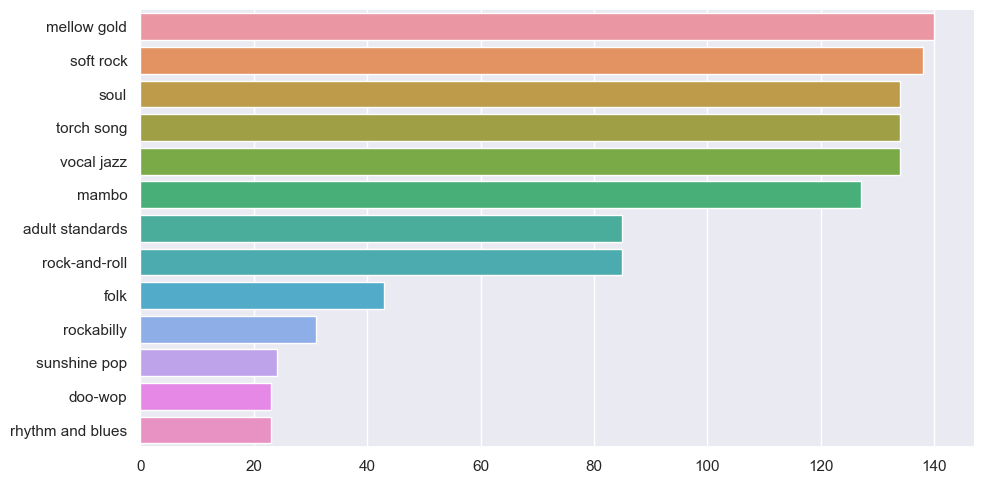

In [288]:
#inner join
interseccion = np.intersect1d(dfGenres.columns, dfGenresPersonal.columns)
generos_populares_comunes = dfGenresPersonal[interseccion]
generos_populares_comunes = generos_populares_comunes.sort_values(by=0,axis=1, ascending=False)
sns.catplot(data = generos_populares_comunes, orient="h", kind="bar",height= 5, aspect= 2)


In [272]:
print(dfGenresPersonal.columns)
dfGenresPersonal.iloc[:,:10]

Index(['disco', 'spanish noise pop', 'spanish indie pop', 'spanish electropop',
       'rap latina', 'instrumental funk', 'bboy', 'new rave', 'baroque pop',
       'rock',
       ...
       'doo-wop', 'rhythm and blues', 'rap marseille', 'hip-hop experimental',
       'electro swing', 'nu jazz', 'urbano espanol', 'rap canario',
       'chilean rock', 'dominican pop'],
      dtype='object', length=164)


,disco,spanish noise pop,spanish indie pop,spanish electropop,rap latina,instrumental funk,bboy,new rave,baroque pop,rock
0,149,148,148,147,147,146,146,145,145,145


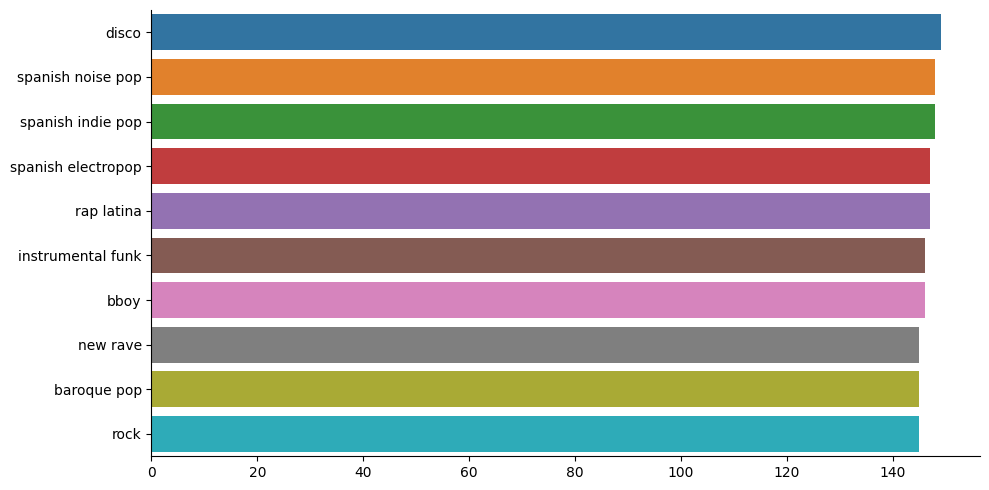

In [114]:
sns.catplot(data = dfGenresPersonal.iloc[:,:10], orient="h", kind="bar",height= 5, aspect= 2)

Canciones que contienen generos populares


In [507]:
generos_populares_comunes.columns


Index(['mellow gold', 'soft rock', 'soul', 'torch song', 'vocal jazz', 'mambo',
       'adult standards', 'rock-and-roll', 'folk', 'rockabilly',
       'sunshine pop', 'doo-wop', 'rhythm and blues'],
      dtype='object')

In [506]:
'soft rock' in generos_populares_comunes.columns

True

In [509]:
dfGenres

,adult standards,bubblegum pop,rockabilly,rock-and-roll,rhythm and blues,doo-wop,lounge,deep adult standards,sunshine pop,mellow gold,...,exotica,library music,laboratorio,classic soundtrack,movie tunes,soft rock,canadian country,american modern classical,folk,american folk revival
0,99,99,99,99,97,97,95,93,92,92,...,55,55,55,52,45,34,34,10,5,5


In [551]:


aPopular = []
for i in dfPersonal["genre"]: 
    items = i.split(",")
    if items:
        
        for j in items:
            popular = False
            r = j.replace("[", "")
            r = r.replace("]", "")
            #r = r.replace(" ", "")
            #r = r.strip()
            for x in generos_populares_comunes.columns:
                if r in x:                    
                    popular = True   
                else:
                    popular = False
                       
        aPopular.append(popular)

#print(generos_populares_comunes.columns)
dfPersonal["popular"] = aPopular
dfPersonal[dfPersonal["popular"] == True]
        



True


,Unnamed: 0,names,artists,release_date,range,id,genre,popularity,danceability,energy,...,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,personal,release_date_year,popular
0,0,Mon Amour - Remix,zzoilo,2021-12-14,short_term,5TAbg7lJkmo1ZO8pCNhchW,[],66,0.748,0.761,...,audio_features,5TAbg7lJkmo1ZO8pCNhchW,spotify:track:5TAbg7lJkmo1ZO8pCNhchW,https://api.spotify.com/v1/tracks/5TAbg7lJkmo1...,https://api.spotify.com/v1/audio-analysis/5TAb...,179940,4,True,2021,True
25,25,Blade,Queralt Lahoz,2022-04-29,short_term,4V21CsNRnycBA4PWFgjNB7,[],42,0.925,0.567,...,audio_features,4V21CsNRnycBA4PWFgjNB7,spotify:track:4V21CsNRnycBA4PWFgjNB7,https://api.spotify.com/v1/tracks/4V21CsNRnycB...,https://api.spotify.com/v1/audio-analysis/4V21...,197512,4,True,2022,True
49,49,Going up the Country,"Kitty, Daisy & Lewis",2008-07-28,short_term,18Zw8HtC0SSQMGJsjrEbAj,[],40,0.808,0.631,...,audio_features,18Zw8HtC0SSQMGJsjrEbAj,spotify:track:18Zw8HtC0SSQMGJsjrEbAj,https://api.spotify.com/v1/tracks/18Zw8HtC0SSQ...,https://api.spotify.com/v1/audio-analysis/18Zw...,197266,4,True,2008,True
50,50,Mon Amour - Remix,zzoilo,2021-12-14,medium_term,5TAbg7lJkmo1ZO8pCNhchW,[],66,0.748,0.761,...,audio_features,5TAbg7lJkmo1ZO8pCNhchW,spotify:track:5TAbg7lJkmo1ZO8pCNhchW,https://api.spotify.com/v1/tracks/5TAbg7lJkmo1...,https://api.spotify.com/v1/audio-analysis/5TAb...,179940,4,True,2021,True
80,80,Calor,Conchita Velasco,2008-01-01,medium_term,2qpjaDs0t7CM6uPcaY6aE1,[],28,0.502,0.852,...,audio_features,2qpjaDs0t7CM6uPcaY6aE1,spotify:track:2qpjaDs0t7CM6uPcaY6aE1,https://api.spotify.com/v1/tracks/2qpjaDs0t7CM...,https://api.spotify.com/v1/audio-analysis/2qpj...,121440,4,True,2008,True
84,84,Calor,Conchita Velasco,2018-04-17,medium_term,3enhhbHP5QlIUglojSSfpp,[],28,0.520,0.833,...,audio_features,3enhhbHP5QlIUglojSSfpp,spotify:track:3enhhbHP5QlIUglojSSfpp,https://api.spotify.com/v1/tracks/3enhhbHP5QlI...,https://api.spotify.com/v1/audio-analysis/3enh...,120387,4,True,2018,True
94,94,Groenlandia,Zombies,1993-07-27,medium_term,2owC2f9sCVSsd2GAKwAQar,[],34,0.726,0.581,...,audio_features,2owC2f9sCVSsd2GAKwAQar,spotify:track:2owC2f9sCVSsd2GAKwAQar,https://api.spotify.com/v1/tracks/2owC2f9sCVSs...,https://api.spotify.com/v1/audio-analysis/2owC...,226733,4,True,1993,True
104,104,Calor,Conchita Velasco,2008-01-01,long_term,2qpjaDs0t7CM6uPcaY6aE1,[],28,0.502,0.852,...,audio_features,2qpjaDs0t7CM6uPcaY6aE1,spotify:track:2qpjaDs0t7CM6uPcaY6aE1,https://api.spotify.com/v1/tracks/2qpjaDs0t7CM...,https://api.spotify.com/v1/audio-analysis/2qpj...,121440,4,True,2008,True
113,113,Mon Amour - Remix,zzoilo,2021-12-14,long_term,5TAbg7lJkmo1ZO8pCNhchW,[],66,0.748,0.761,...,audio_features,5TAbg7lJkmo1ZO8pCNhchW,spotify:track:5TAbg7lJkmo1ZO8pCNhchW,https://api.spotify.com/v1/tracks/5TAbg7lJkmo1...,https://api.spotify.com/v1/audio-analysis/5TAb...,179940,4,True,2021,True
130,130,History Repeating,Propellerheads Feat. Miss Shirley Bassey,2000-11-13,long_term,05mdiAnALU200LER7TId7R,[],25,0.706,0.681,...,audio_features,05mdiAnALU200LER7TId7R,spotify:track:05mdiAnALU200LER7TId7R,https://api.spotify.com/v1/tracks/05mdiAnALU20...,https://api.spotify.com/v1/audio-analysis/05md...,244000,4,True,2000,True


In [209]:
'chilean indie' in generos_populares.columns

True

In [207]:
import numpy as np
aCancionesPopulares = []
generos_populares_comunes['chilean indie']=5
for i,row in dfPersonal["genre"].items():    
    row.replace("[", "")
    row.replace("]", "")    
    spl = row.split(",")
    for j in spl:
        res = j.replace("[", "")
        res = res.replace("]", "")
        print(res, res in generos_populares_comunes.columns)
        if res in generos_populares_comunes.columns:
            print(j)
            aCancionesPopulares.append(row)

aCancionesPopulares
    
    


 False
'chilean indie' False
 'deep latin alternative' False
'cantautor' False
 'latin arena pop' False
 'latin pop' False
 'mexican pop' False
 'rock en espanol' False
 'spanish pop' False
'granada indie' False
'granada indie' False
'alternative dance' False
 'electro house' False
 'electroclash' False
 'electronica' False
 'filter house' False
 'french indietronica' False
 'french techno' False
 'new rave' False
'british soul' False
 'neo soul' False
'spanish indie pop' False
 'spanish noise pop' False
'dance rock' False
 'new romantic' False
 'new wave' False
 'new wave pop' False
 'pop rock' False
 'rock' False
 'synthpop' False
'deep latin alternative' False
 'dominican pop' False
'alternative dance' False
 'electro house' False
 'electroclash' False
 'electronica' False
 'filter house' False
 'french indietronica' False
 'french techno' False
 'new rave' False
'dance pop' False
 'pop' False
'alternative dance' False
 'electro house' False
 'electroclash' False
 'electronica' Fals

C:\Users\yporq\AppData\Local\Temp\ipykernel_37604\343259822.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[]